In [9]:
library(naturalsort)
library(data.table)
flst <- naturalsort(list.files('~/jackgl/analyses/gene_all_counts/')) # File names are same for each directory (lung, colon, brain)

In [10]:
chroms <- c(1:22,'X','Y')
for (i in 1:24) {
    load(paste0('~/jackgl/analyses/gene_all_counts/',flst[i+1]))
    rownames(counts) <- gnames
    counts[,1] <- counts[,1]*7.46
    counts[,2] <- counts[,2]*3.48
    counts[,3] <- counts[,3]*2.05
    counts[,4] <- counts[,4]*1.00
    counts <- round(rowSums(counts))
    if (i==1) {
        out <- data.table(chrom=rep(chroms[i],length(counts)),geneSym=as.vector(gnames),p=counts,type=rep(0,length(counts)))
    } else {
        tmp <- data.table(chrom=rep(chroms[i],length(counts)),geneSym=as.vector(gnames),p=counts,type=rep(0,length(counts)))
        out <- rbind(out,tmp)
    }
}
# out$p <- out$p/sum(out$p)
tail(out)
gene_pdt <- out

chrom,geneSym,p,type
Y,TPTE2P4,38716,0
Y,CYCSP49,140,0
Y,SLC25A15P1,1660,0
Y,PARP4P1,19718,0
Y,FAM58CP,37,0
Y,CTBP2P1,23,0


In [11]:
tsgs <- read.table('~/jackgl/sim-develop/data/Human_TSGs.txt')
tsgs <- tsgs$V2
tsgs <- tsgs[2:length(tsgs)]
head(tsgs)

[1] ACHE   ACY1   ADARB1 ADPRH  PARP1  AGTR1 
1218 Levels: ABCG2 ABI2 ACHE ACVR1C ACY1 ADAMTS18 ADAMTS8 ADAMTS9 ... ZYX

In [12]:
gene_pdt[order(-gene_pdt$p),][1:20]

chrom,geneSym,p,type
9,PTPRD,1322392,0
7,CNTNAP2,1250348,0
X,DMD,1235688,0
6,EYS,1159383,0
11,DLG2,1157695,0
2,LRP1B,1126278,0
20,MACROD2,1091442,0
10,PCDH15,1090665,0
8,CSMD1,1064584,0
10,CTNNA3,1014559,0


In [13]:
cat('Genes in TSGene 2.0:')
length(tsgs)
cat('Found in Ensembl v86 gene annotation:')
length(which(gene_pdt$geneSym %in% tsgs))
cat(paste(length(which(gene_pdt$geneSym %in% tsgs))/length(tsgs)*100,'%'))

Genes in TSGene 2.0:

[1] 1217

Found in Ensembl v86 gene annotation:

[1] 1172

96.3023829087921 %

In [26]:
gene_pdt_tsgs <- gene_pdt[gene_pdt$geneSym %in% tsgs]
gene_pdt_tsgs[order(-gene_pdt_tsgs$p),][1:50]

chrom,geneSym,p,type
9,PTPRD,1322392,0
7,CNTNAP2,1250348,0
X,DMD,1235688,0
2,LRP1B,1126278,0
8,CSMD1,1064584,0
10,CTNNA3,1014559,0
13,GPC5,830942,0
3,RBMS3,783442,0
3,FHIT,748427,0
2,CTNNA2,736908,0


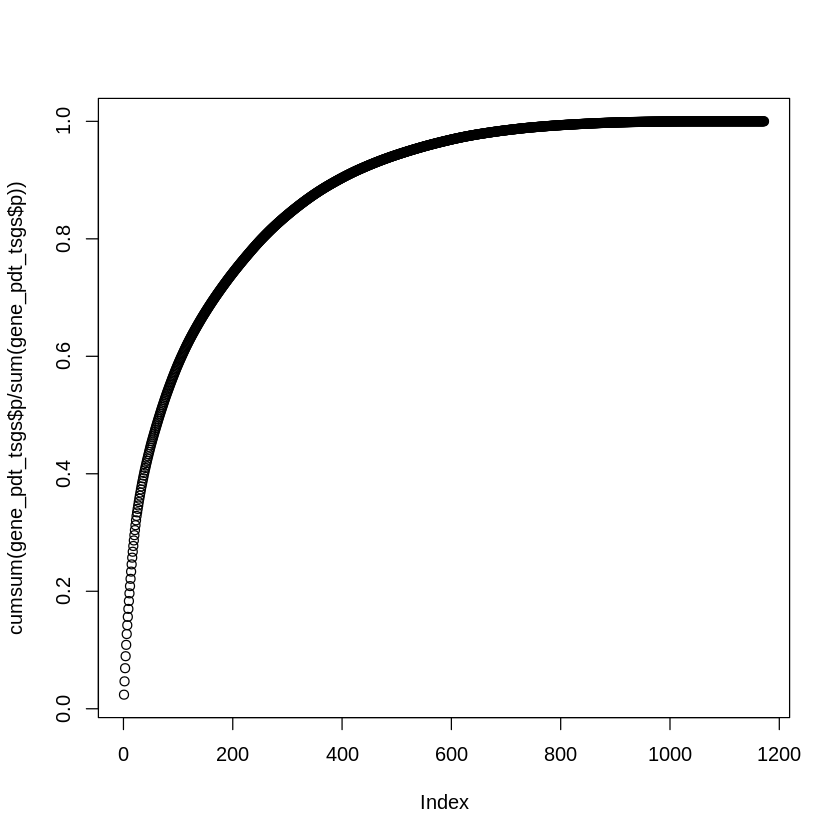

In [16]:
plot(cumsum(gene_pdt_tsgs$p/sum(gene_pdt_tsgs$p)))
test <- cumsum(gene_pdt_tsgs$p/sum(gene_pdt_tsgs$p))
# test[1:50]

In [18]:
lee_genes <- read.table('~/jackgl/lee_genes.txt')
head(lee_genes)
length(lee_genes$V1)

V1
SPHKAP
ERBB4
KCNIP1
FPR2
COL11A1
GPR158


[1] 65

In [19]:
length(which(lee_genes$V1 %in% gene_pdt_tsgs$geneSym))

[1] 7

In [20]:
which(lee_genes$V1 %in% gene_pdt_tsgs$geneSym)

[1]  2 22 26 32 50 56 62

In [24]:
library(EnsDb.Hsapiens.v86)
gann <- genes(EnsDb.Hsapiens.v86)
gann <- data.table(chrom=as.vector(seqnames(gann)),start=start(gann),end=end(gann),geneSym=gann$gene_name)
gann$len <- gann$end-gann$start
gann <- gann[gann$chrom %in% c(1:22,'X','Y'),]

In [27]:
gann[order(-gann$len),][1:50]

chrom,start,end,geneSym,len
7,146116002,148420998,CNTNAP2,2304996
9,8314246,10612723,PTPRD,2298477
X,31097677,33339441,DMD,2241764
11,83455012,85627922,DLG2,2172910
X,31119228,33211556,DMD,2092328
8,2935353,4994972,CSMD1,2059619
20,13995369,16053197,MACROD2,2057828
6,63719980,65707225,EYS,1987245
2,140231423,142131701,LRP1B,1900278
10,53802771,55627942,PCDH15,1825171
